# Load data

In [17]:
import scanpy as sc

#combined_adata = ad.read_h5ad('/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/combined_adata.h5ad')
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/filtered_preprocessed_combined_adata.h5ad")
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/annotated_adata.h5ad")
#adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/clustered_adata.h5ad")
adata = sc.read("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/hvg_adata.h5ad")

# Create dictionary

In [29]:
from biomart import BiomartServer

# Connect to the BioMart server
server = BiomartServer("http://ensembl.org/biomart")

# Select the human genes dataset
dataset = server.datasets['hsapiens_gene_ensembl']

# Query BioMart to get the translation from Ensembl ID to gene symbol
response = dataset.search({
    'attributes': ['ensembl_gene_id', 'external_gene_name'],
})

# Initialize an empty dictionary to store the mapping
ensembl_to_gene_name = {}

# Iterate through the response lines
for line in response.iter_lines():
    # Decode the line and split it into Ensembl ID and gene name
    decoded_line = line.decode('utf-8')
    ensembl_id, gene_name = decoded_line.split('\t')
    
    # Store the mapping in the dictionary
    ensembl_to_gene_name[ensembl_id] = gene_name

# Now, ensembl_to_gene_name is a dictionary with Ensembl IDs as keys and gene names as values.


# Cell Cycle corrections

## Determine Cell Cycle Genes

In [30]:
#ensembl_to_gene_name[ensembl_id] = gene_name

In [31]:
import scanpy as sc

# Example list of S phase and G2/M phase genes
# You should use literature or data-driven methods to get a good list for your organism and cell type
s_genes = [
    'MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4', 'RRM1', 'UNG', 'GINS2', 'MCM6',
    'CDCA7', 'DTL', 'PRIM1', 'UHRF1', 'MLF1IP', 'HELLS', 'RFC2', 'RPA2', 'NASP', 
    'RAD51AP1', 'GMNN', 'WDR76', 'SLBP', 'CCNE2', 'UBR7', 'POLD3', 'MSH2', 'ATAD2',
    'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1', 'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 
    'USP1', 'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 'E2F8'
]
g2m_genes = [
    'HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5', 'TPX2', 'TOP2A', 'NDC80', 'CKS2', 
    'NUF2', 'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3', 'FAM64A', 'SMC4', 'CCNB2', 
    'CKAP2L', 'CKAP2', 'AURKB', 'BUB1', 'KIF11', 'ANP32E', 'TUBB4B', 'GTSE1', 'KIF20B', 
    'HJURP', 'CDCA3', 'HN1', 'CDC20', 'TTK', 'CDC25C', 'KIF2C', 'RANGAP1', 'NCAPD2', 
    'DLGAP5', 'CDCA2', 'CDCA8', 'ECT2', 'KIF23', 'HMMR', 'AURKA', 'PSRC1', 'ANLN', 
    'LBR', 'CKAP5', 'CENPE', 'CTCF', 'NEK2', 'G2E3', 'GAS2L3', 'CBX5', 'CENPA'
]





In [32]:
# Reverse the dictionary so that gene names are keys and Ensembl IDs are values
gene_name_to_ensembl = {v: k for k, v in ensembl_to_gene_name.items()}

# Translate the s_genes list
s_genes_ensembl = [gene_name_to_ensembl[gene] for gene in s_genes if gene in gene_name_to_ensembl]

# Translate the g2m_genes list
g2m_genes_ensembl = [gene_name_to_ensembl[gene] for gene in g2m_genes if gene in gene_name_to_ensembl]

print("s_genes Ensembl IDs:", s_genes_ensembl)
print("g2m_genes Ensembl IDs:", g2m_genes_ensembl)

#s_genes = s_genes_ensembl
#g2m_genes = g2m_genes_ensembl




s_genes Ensembl IDs: ['ENSG00000100297', 'ENSG00000132646', 'ENSG00000176890', 'ENSG00000168496', 'ENSG00000073111', 'ENSG00000104738', 'ENSG00000167325', 'ENSG00000076248', 'ENSG00000131153', 'ENSG00000076003', 'ENSG00000144354', 'ENSG00000143476', 'ENSG00000198056', 'ENSG00000276043', 'ENSG00000119969', 'ENSG00000049541', 'ENSG00000117748', 'ENSG00000132780', 'ENSG00000111247', 'ENSG00000112312', 'ENSG00000092470', 'ENSG00000163950', 'ENSG00000175305', 'ENSG00000012963', 'ENSG00000077514', 'ENSG00000095002', 'ENSG00000156802', 'ENSG00000051180', 'ENSG00000171848', 'ENSG00000093009', 'ENSG00000094804', 'ENSG00000174371', 'ENSG00000075131', 'ENSG00000136982', 'ENSG00000197299', 'ENSG00000118412', 'ENSG00000162607', 'ENSG00000092853', 'ENSG00000101868', 'ENSG00000159259', 'ENSG00000136492', 'ENSG00000129173']
g2m_genes Ensembl IDs: ['ENSG00000164104', 'ENSG00000170312', 'ENSG00000137804', 'ENSG00000175063', 'ENSG00000089685', 'ENSG00000088325', 'ENSG00000131747', 'ENSG00000080986', 'ENS

In [33]:
# Translate the s_genes and g2m_genes lists to Ensembl IDs
#s_genes_ensembl = [gene_name_to_ensembl[gene] for gene in s_genes if gene in gene_name_to_ensembl]
#g2m_genes_ensembl = [gene_name_to_ensembl[gene] for gene in g2m_genes if gene in gene_name_to_ensembl]

# Annotate adata.var using binary representation
adata.var['is_s_gene'] = adata.var.index.isin(s_genes_ensembl).astype(int)
adata.var['is_g2m_gene'] = adata.var.index.isin(g2m_genes_ensembl).astype(int)

# Check the annotations
print(adata.var[['is_s_gene', 'is_g2m_gene']])

                 is_s_gene  is_g2m_gene
feature_id                             
ENSG00000188290          0            0
ENSG00000187608          0            0
ENSG00000184163          0            0
ENSG00000049249          0            0
ENSG00000235643          0            0
...                    ...          ...
ENSG00000212907          0            0
ENSG00000198886          0            0
ENSG00000198786          0            0
ENSG00000198695          0            0
ENSG00000198727          0            0

[2000 rows x 2 columns]


## Scoring of the Cell Cylce 

In [34]:
# Calculate scores
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes_ensembl, g2m_genes=g2m_genes_ensembl)

In [35]:
adata

AnnData object with n_obs × n_vars = 10837 × 2000
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_cmo', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'leiden', 'leiden_combined', 'louvain', 'louvain_combined', 'S_score', 'G2M_score', 'phase'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'CMO', 'mito', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'is_s_gene', 'is_g2m_gene'
    uns: 'condition_colors', 'hvg', 'leiden', 'leiden_combined_colors', 'log1p', 'louvain', 'louvain_combined_colors', 'neighbors', 'pca', 'umap', 'phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'dista

## Visualize the Cell Cycle Genes

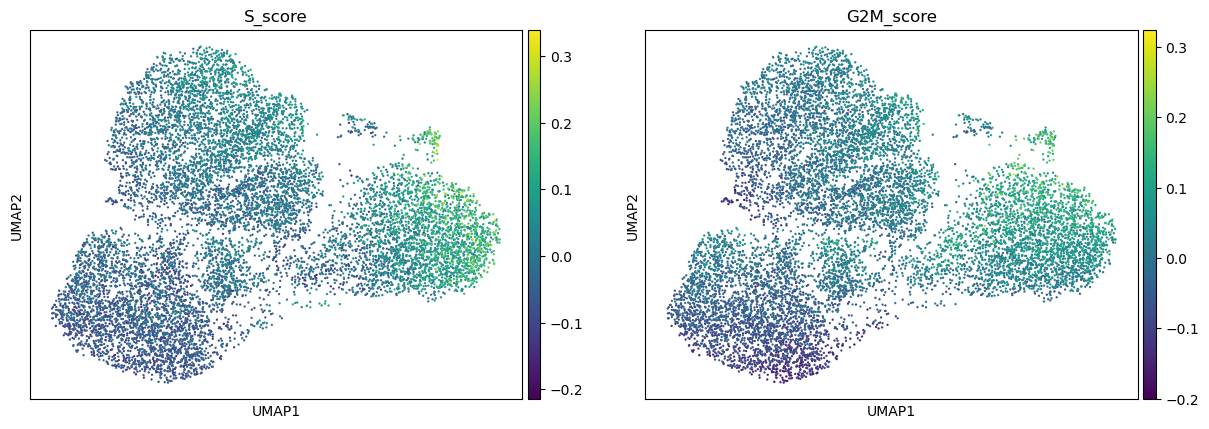

In [36]:
sc.tl.pca(adata, svd_solver="arpack") # PCA
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40) # Neighborhood Graph Construction
sc.tl.umap(adata)
sc.pl.umap(adata, color=['S_score', 'G2M_score'])

In [ ]:
### no use!!

import scanpy as sc

# Transpose the adata object
adata_transposed = sc.AnnData(X=adata.X.T, var=adata.obs, obs=adata.var)

# PCA
sc.tl.pca(adata_transposed, svd_solver="arpack")

# Neighborhood Graph Construction
sc.pp.neighbors(adata_transposed, n_neighbors=10, n_pcs=40)

# UMAP
sc.tl.umap(adata_transposed)

# Plot UMAP with gene annotations
sc.pl.umap(adata_transposed, color=['is_s_gene', 'is_g2m_gene'])

In [ ]:
## no use

# Combine both gene lists
cell_cycle_genes = s_genes_ensembl + g2m_genes_ensembl

# Regress out cell cycle effects
sc.pp.regress_out(adata, keys=cell_cycle_genes)

# Scale the data to ensure mean 0 and variance 1 for each gene
sc.pp.scale(adata)

## Regress the data accoridng to the Cell Cycle Score

In [38]:
# Normalize data
#sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
#sc.pp.log1p(adata)

# Regress out cell cycle scores
sc.pp.regress_out(adata, ["S_score", "G2M_score"])

# Scale data
sc.pp.scale(adata, max_value=10, zero_center=True, copy=False)

# Scale data and regress out cell cycle scores
#sc.pp.scale(adata, max_value=10, zero_center=True, copy=False, regressors=["S_score", "G2M_score"])

## Visualize the corrected Cell Cycle Genes

/home2/lumpi/miniconda3/envs/scanpy-env3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


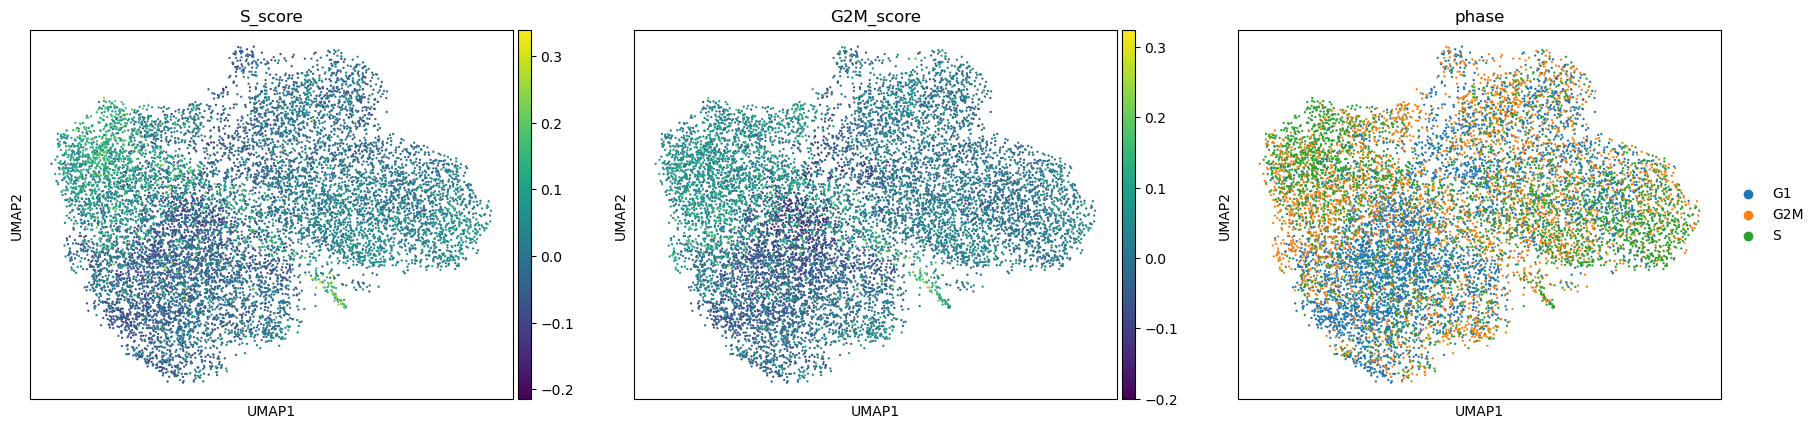

In [39]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['S_score', 'G2M_score', 'phase'])

In [40]:
adata.write("/storage/users/sac43cg/res_Samantha_1/outs/per_sample_outs/cellcycle_adata.h5ad")